In [2]:
import numpy
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\EmployeeAnalysis\PS DA Task.xlsx"
data = pd.read_excel(file_path)


print(data.head())


   EmployeeNumber    Surname GivenName Gender             City JobTitle  \
0               1  Gutierrez     Molly      F          Burnaby    Baker   
1               2   Hardwick   Stephen      M        Courtenay    Baker   
2               3    Delgado   Chester      M         Richmond    Baker   
3               4      Simon     Irene      F         Victoria    Baker   
4               5   Delvalle    Edward      M  New Westminster    Baker   

  DepartmentName    StoreLocation Division        Age  LengthService  \
0         Bakery          Burnaby   Stores  32.028816       6.018478   
1         Bakery          Nanaimo   Stores  40.320902       5.532445   
2         Bakery         Richmond   Stores  48.822047       4.389973   
3         Bakery         Victoria   Stores  44.599357       3.081736   
4         Bakery  New Westminster   Stores  35.697876       3.619091   

   AbsentHours BusinessUnit  
0    36.577306       Stores  
1    30.165072       Stores  
2    83.807798       Store

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB
None


In [10]:
print(data.isnull().sum())

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64


In [11]:
# Display summary statistics for numeric columns
print(data[['Age', 'LengthService', 'AbsentHours']].describe())

# Check the unique values for categorical columns
for col in ['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']:
    print(f"{col} - Unique Values: {data[col].nunique()}")



               Age  LengthService  AbsentHours
count  8336.000000    8336.000000  8336.000000
mean     42.007086       4.782910    61.283978
std       9.939798       2.462990    49.038365
min       3.504743       0.012098     0.000000
25%      35.298748       3.575892    19.127590
50%      42.114924       4.600248    56.005808
75%      48.666943       5.623922    94.284692
max      77.938003      43.735239   272.530123
Gender - Unique Values: 2
City - Unique Values: 243
JobTitle - Unique Values: 47
DepartmentName - Unique Values: 21
StoreLocation - Unique Values: 40
Division - Unique Values: 6
BusinessUnit - Unique Values: 2


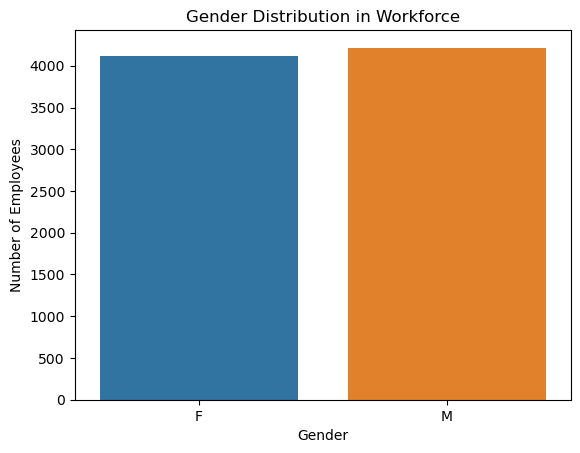

In [12]:
# Exploratory Data Analysis (EDA) with Visualizations
sns.countplot(data, x='Gender')
plt.title("Gender Distribution in Workforce")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.show()




In [13]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
M    4216
F    4120
Name: count, dtype: int64


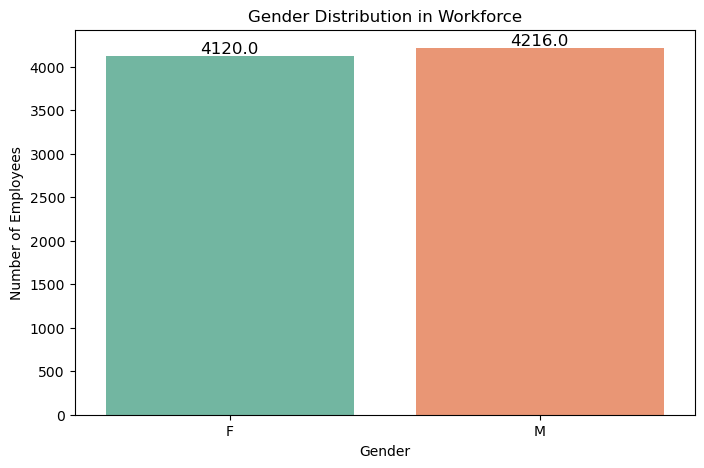

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data, x='Gender', palette='Set2')

# Annotate the counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom',  # Position the label above the bar
                fontsize=12)

plt.title("Gender Distribution in Workforce")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.show()

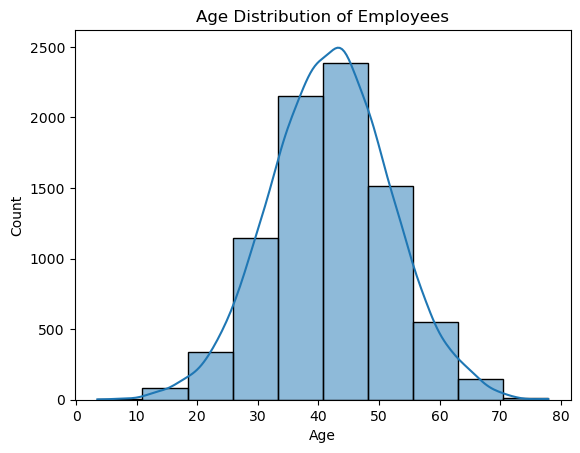

In [8]:
#Age Distribution
sns.histplot(data['Age'], bins=10, kde=True)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.show()


In [9]:
# Descriptive statistics for Age
age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_std = data['Age'].std()

print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}")


Mean Age: 42.01
Median Age: 42.11
Standard Deviation of Age: 9.94


In [10]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of employees in each age group
age_group_counts = data['AgeGroup'].value_counts().sort_index()
print(age_group_counts)


AgeGroup
20-29     817
30-39    2548
40-49    3122
50-59    1419
60-69     292
Name: count, dtype: int64


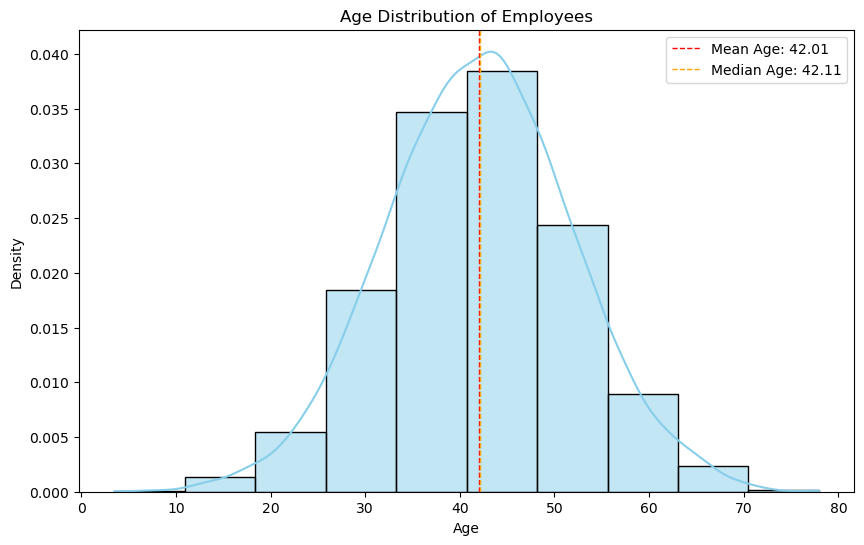

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue', stat='density')

# Annotating mean and median
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age: {age_mean:.2f}')
plt.axvline(age_median, color='orange', linestyle='dashed', linewidth=1, label=f'Median Age: {age_median:.2f}')


plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


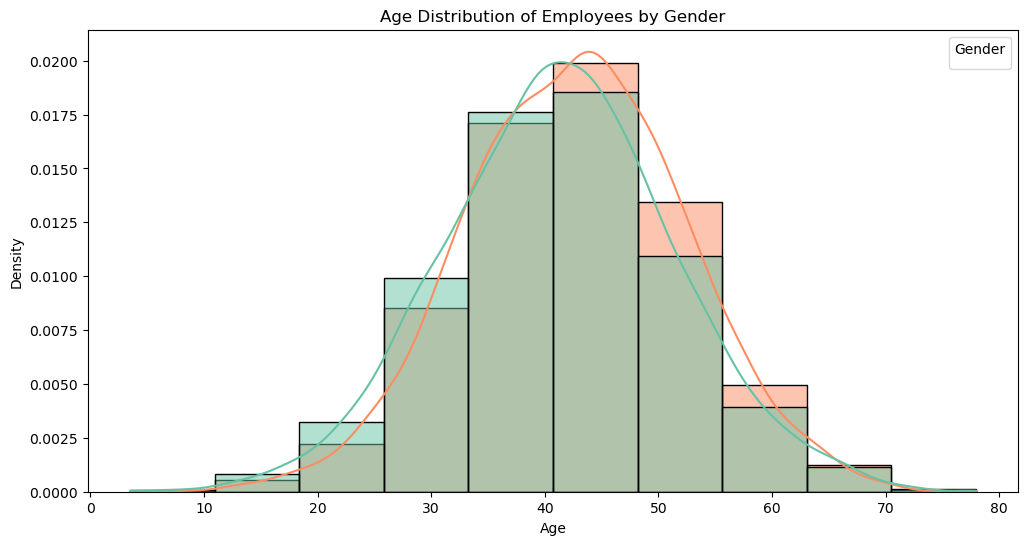

In [12]:
# Age Distribution by Gender
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Age', hue='Gender', bins=10, kde=True, stat='density', palette='Set2')
plt.title("Age Distribution of Employees by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title='Gender')
plt.show()


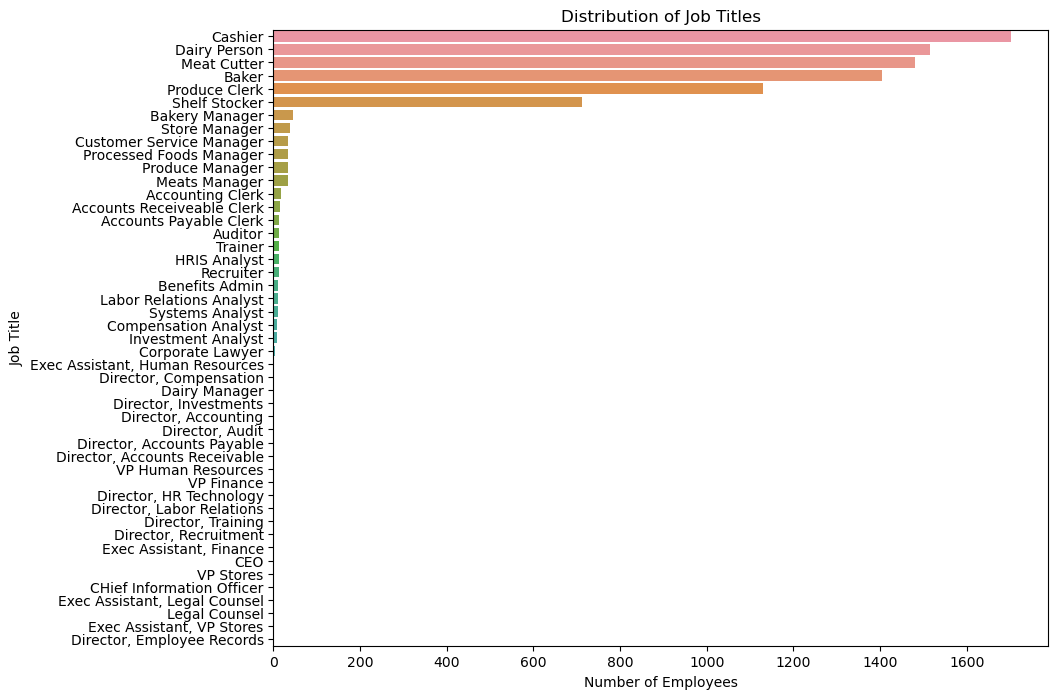

In [13]:

plt.figure(figsize=(10, 8))
sns.countplot(data, y='JobTitle', order=data['JobTitle'].value_counts().index)
plt.title("Distribution of Job Titles")
plt.ylabel("Job Title")
plt.xlabel("Number of Employees")
plt.show()


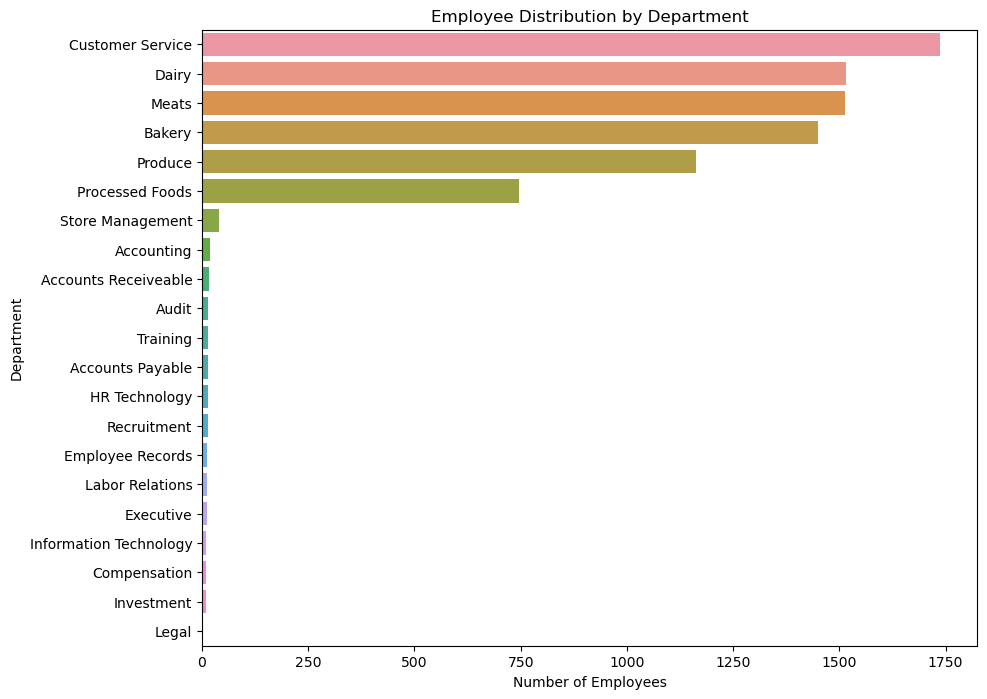

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y='DepartmentName', order=data['DepartmentName'].value_counts().index)
plt.title("Employee Distribution by Department")
plt.ylabel("Department")
plt.xlabel("Number of Employees")
plt.show()


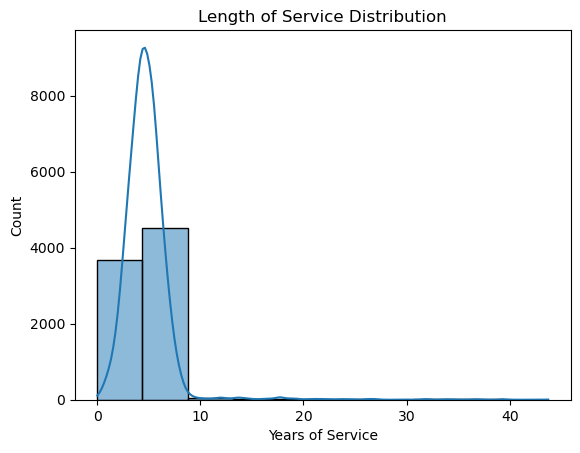

In [15]:
sns.histplot(data['LengthService'], bins=10, kde=True)
plt.title("Length of Service Distribution")
plt.xlabel("Years of Service")
plt.show()


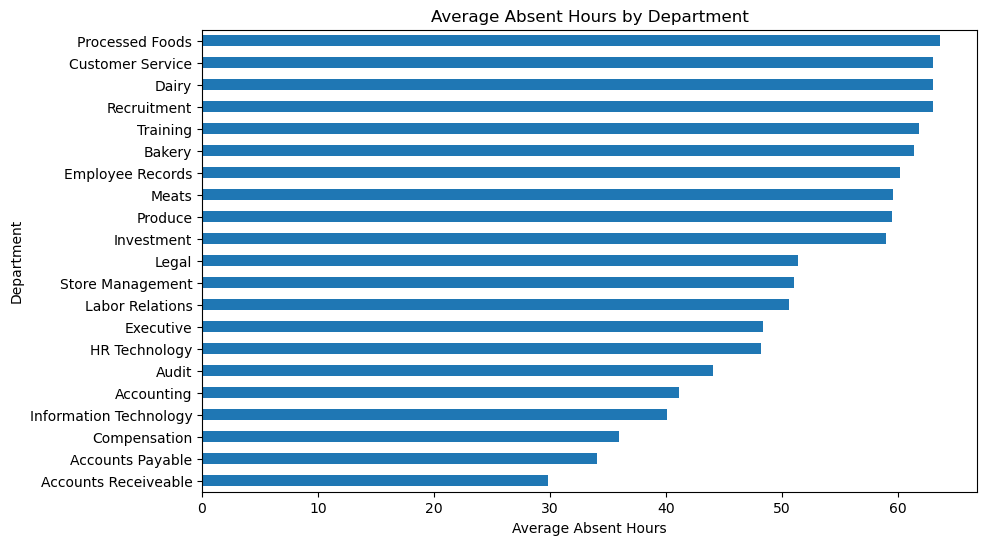

In [16]:
department_absent_hours = data.groupby('DepartmentName')['AbsentHours'].mean().sort_values()
department_absent_hours.plot(kind='barh', figsize=(10, 6))
plt.title("Average Absent Hours by Department")
plt.xlabel("Average Absent Hours")
plt.ylabel("Department")
plt.show()


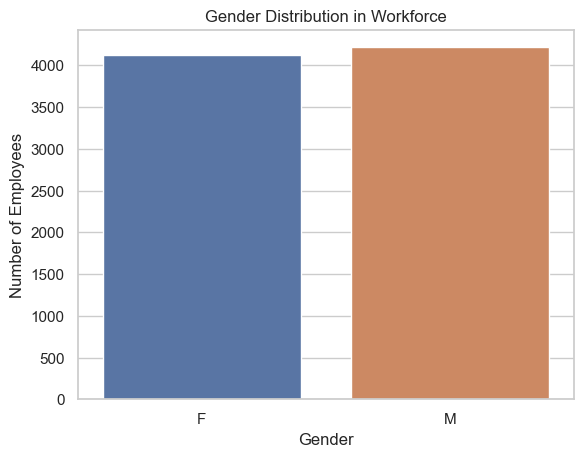

Gender
M    4216
F    4120
Name: count, dtype: int64


In [23]:

sns.countplot(data, x='Gender')
plt.title("Gender Distribution in Workforce")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.show()
gender_counts = data['Gender'].value_counts()
print(gender_counts)



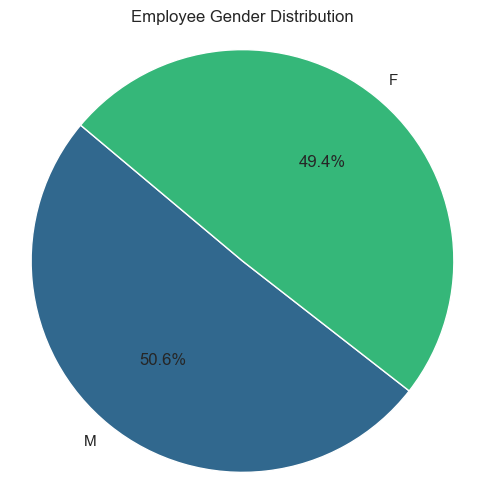

In [30]:
# Create a pie chart using the correct variable
plt.figure(figsize=(6, 6))
plt.pie(gender_counts,  # Use gender_counts or gender_distribution
        labels=gender_counts.index,  # Use gender_counts.index for labels
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("viridis", len(gender_counts)))
plt.title('Employee Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [31]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)


Gender
M    4216
F    4120
Name: count, dtype: int64


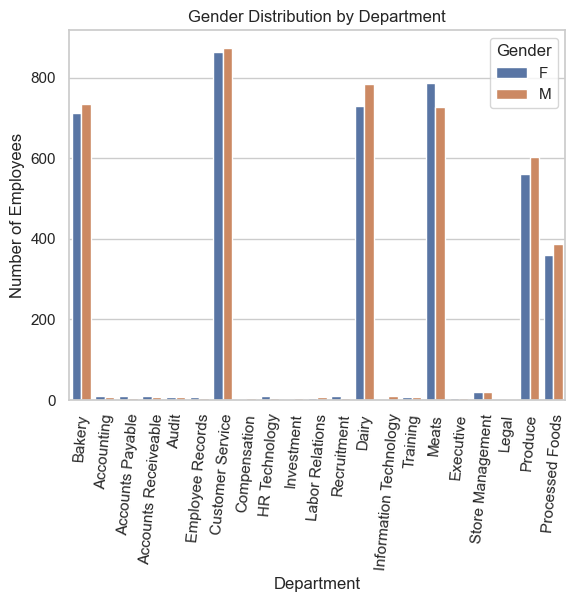

In [35]:
sns.countplot(data=data, x='DepartmentName', hue='Gender')
plt.title("Gender Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=85)
plt.legend(title='Gender')
plt.show()


In [36]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Gender'], data['DepartmentName'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, p-value: {p}')


Chi-Square Statistic: 21.638961594341435, p-value: 0.3604184551249482


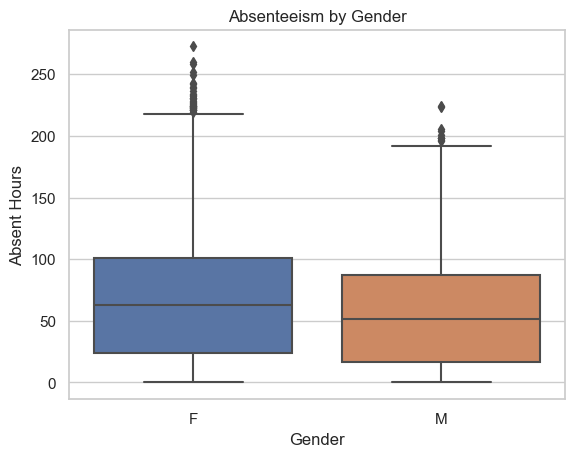

Male Absent Hours Count: 4216
Female Absent Hours Count: 4120
T-statistic: -10.005834836476094, P-value: 1.9476329033146944e-23


In [55]:
###Hypothesis 1: Gender and Absenteeism
sns.boxplot(data=data, x='Gender', y='AbsentHours')
plt.title("Absenteeism by Gender")
plt.xlabel("Gender")
plt.ylabel("Absent Hours")
plt.show()

from scipy.stats import ttest_ind

# Filter AbsentHours by 'M' and 'F' for Gender, while dropping any NaN values in AbsentHours
male_absent_hours = data[(data['Gender'] == 'M') & (data['AbsentHours'].notna())]['AbsentHours']
female_absent_hours = data[(data['Gender'] == 'F') & (data['AbsentHours'].notna())]['AbsentHours']

# Print counts to verify data selection
print("Male Absent Hours Count:", len(male_absent_hours))
print("Female Absent Hours Count:", len(female_absent_hours))

# Proceed with the t-test if both groups have at least one entry
if len(male_absent_hours) > 1 and len(female_absent_hours) > 1:
    t_stat, p_value = ttest_ind(male_absent_hours, female_absent_hours, nan_policy='omit')
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
else:
    print("Insufficient data for one or both groups to perform a t-test.")


In [78]:
###Hypothesis 1: Gender and Absenteeism
#Male Absent Hours Count: 4216
#Female Absent Hours Count: 4120
#T-statistic: -10.005834836476094, P-value: 1.9476329033146944e-23

##Hypothesis 2: Gender and Length of Service
#T-statistic: 0.1221523853460677, P-value: 0.9027812801579312

##Hypothesis 3: Gender and Job Titles (or Departments)
#Chi-Square Statistic: 21.638961594341435, P-value: 0.3604184551249482

##Hypothesis 4: Gender and Age Distribution
#T-statistic: 6.424014058545995, P-value: 1.400021529043846e-10

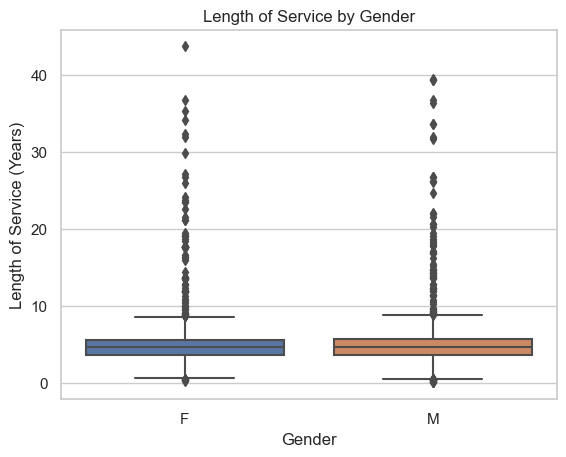

T-statistic: 0.1221523853460677, P-value: 0.9027812801579312


In [53]:
##Hypothesis 2: Gender and Length of Service
sns.boxplot(data=data, x='Gender', y='LengthService')
plt.title("Length of Service by Gender")
plt.xlabel("Gender")
plt.ylabel("Length of Service (Years)")
plt.show()
male_length_service = data[data['Gender'] == 'M']['LengthService']
female_length_service = data[data['Gender'] == 'F']['LengthService']

# Perform the t-test
t_stat, p_value = ttest_ind(male_length_service, female_length_service, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")


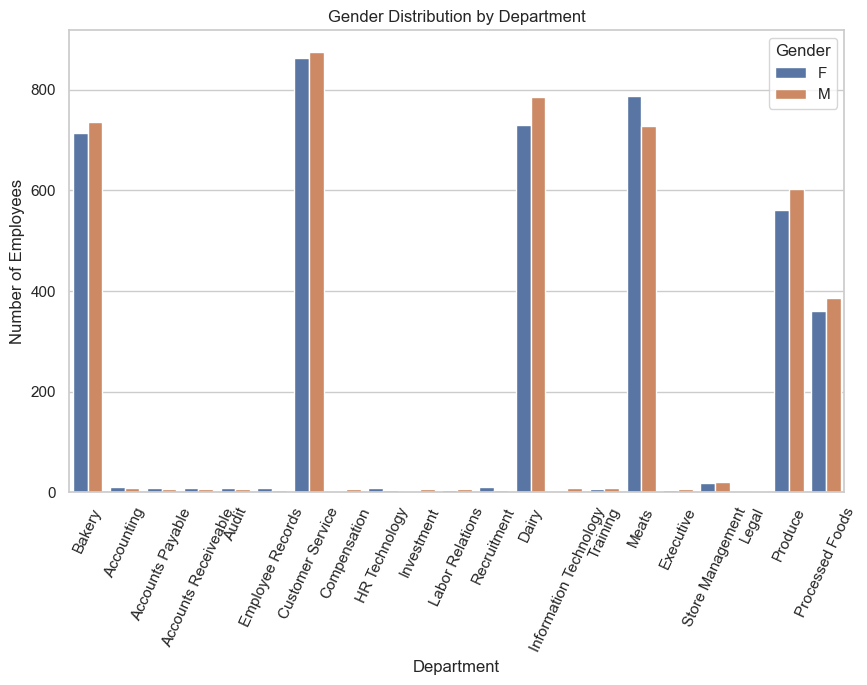

Chi-Square Statistic: 21.638961594341435, P-value: 0.3604184551249482


In [62]:
##Hypothesis 3: Gender and Job Titles (or Departments)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DepartmentName', hue='Gender')
plt.title("Gender Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=65)
plt.legend(title='Gender')
plt.show()
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['DepartmentName'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


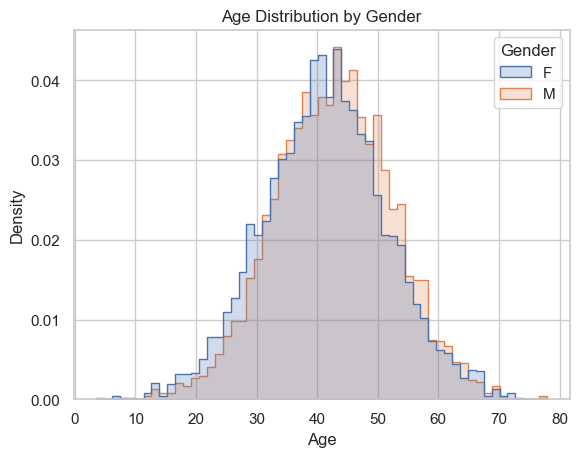

T-statistic: 6.424014058545995, P-value: 1.400021529043846e-10


In [66]:
##Hypothesis 4: Gender and Age Distribution
sns.histplot(data=data, x='Age', hue='Gender', element='step', stat='density', common_norm=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()
male_age = data[data['Gender'] == 'M']['Age']
female_age = data[data['Gender'] == 'F']['Age']

# Perform the t-test
t_stat, p_value = ttest_ind(male_age, female_age, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")


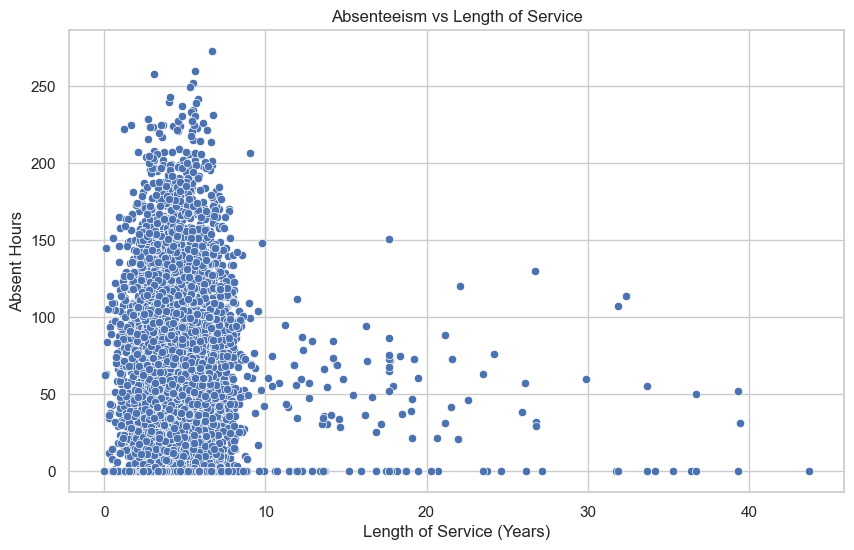

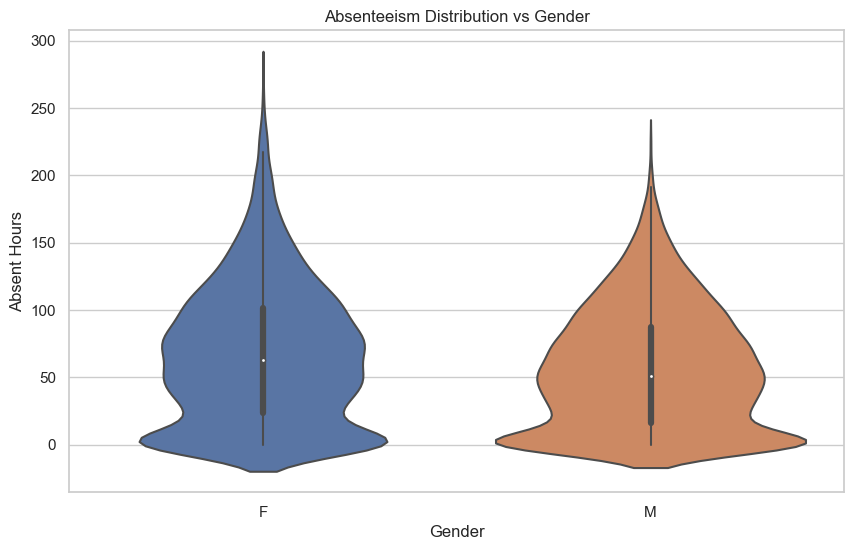

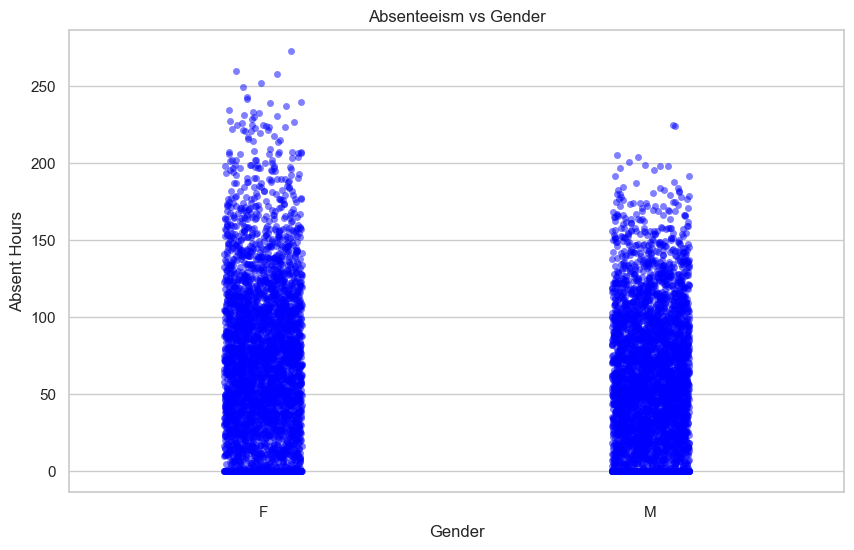

In [74]:
# Scatter plot for Length of Service vs Absenteeism
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LengthService', y='AbsentHours', data=data)
plt.title('Absenteeism vs Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Absent Hours')
plt.show()


# Violin plot for Absenteeism by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='AbsentHours', data=data)
plt.title('Absenteeism Distribution vs Gender')
plt.xlabel('Gender')
plt.ylabel('Absent Hours')
plt.show()

# Scatter plot for Absenteeism vs Gender with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='Gender', y='AbsentHours', data=data, jitter=True, color='blue', alpha=0.5)
plt.title('Absenteeism vs Gender')
plt.xlabel('Gender')
plt.ylabel('Absent Hours')
plt.show()





In [ ]:
#Linear Regression

In [81]:
import statsmodels.api as sm


# Convert categorical variables to dummies
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})  # Example encoding
X = data[['Gender', 'LengthService', 'Age']]
y = data['AbsentHours']

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     7332.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:05:26   Log-Likelihood:                -38891.
No. Observations:                8336   AIC:                         7.779e+04
Df Residuals:                    8332   BIC:                         7.782e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -113.8903      1.364    -83.493

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Sample DataFrame setup (assuming df is your DataFrame)
data['Absent'] = (data['AbsentHours'] > 0).astype(int)  # Create binary variable for absenteeism
X = data[['Gender', 'LengthService', 'Age']]  # Independent variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = data['Absent']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Getting the model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display the coefficients
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef}")

print(f"Intercept: {intercept}")


Confusion Matrix:
 [[ 128  103]
 [  62 1375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.61       231
           1       0.93      0.96      0.94      1437

    accuracy                           0.90      1668
   macro avg       0.80      0.76      0.78      1668
weighted avg       0.89      0.90      0.90      1668

Coefficient for Gender: 0.8306802634238976
Coefficient for LengthService: -0.18464044056364515
Coefficient for Age: 0.3192597686053564
Intercept: -9.326937869851582


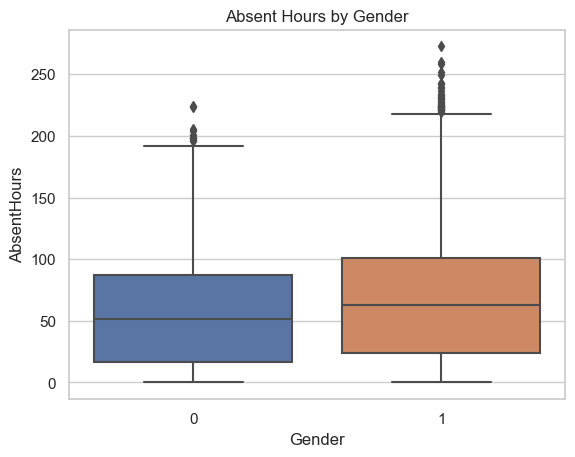

In [84]:


sns.boxplot(x='Gender', y='AbsentHours', data=data)
plt.title('Absent Hours by Gender')
plt.show()


In [ ]:
##Advanced Statistical Analysis


In [88]:
#Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Gender', 'LengthService', 'Age']]
X = pd.get_dummies(X, drop_first=True)  # Include dummies if needed
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


        Variable       VIF
0         Gender  1.847394
1  LengthService  4.184007
2            Age  4.660283


In [92]:
data['Gender_Age_Interaction'] = data['Gender'] * data['Age']


In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
import matplotlib.pyplot as plt




Cross-validation scores: [0.89868106 0.89682064 0.91061788 0.910018   0.89982004]


Confusion Matrix:
 [[ 128  103]
 [  62 1375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.61       231
           1       0.93      0.96      0.94      1437

    accuracy                           0.90      1668
   macro avg       0.80      0.76      0.78      1668
weighted avg       0.89      0.90      0.90      1668



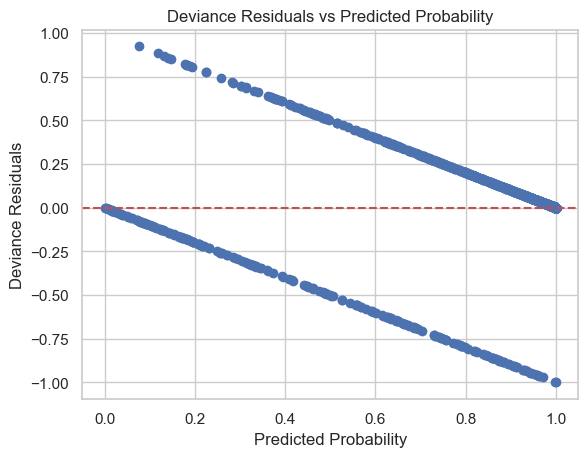

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Absent' is your binary target variable
data['Absent'] = (data['AbsentHours'] > 0).astype(int)  # Create binary variable for absenteeism
X = data[['Gender', 'LengthService', 'Age']]  # Independent variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = data['Absent']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities

# Calculate residuals
residuals = y_test - y_probs

# Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot residuals
plt.scatter(y_probs, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs Predicted Probability')
plt.show()


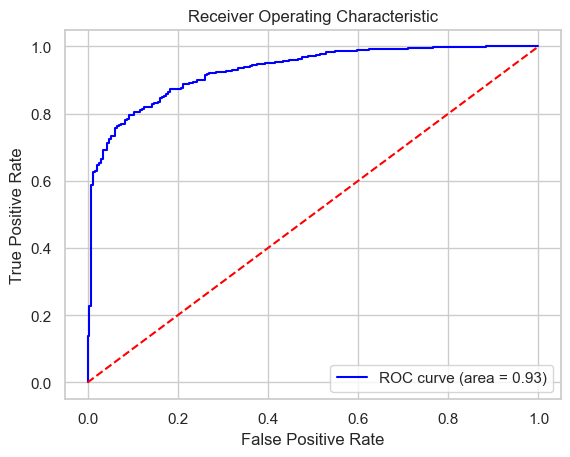

In [101]:

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


<Figure size 640x480 with 0 Axes>

In [5]:
print(data.index)
print(data.columns)

RangeIndex(start=0, stop=8336, step=1)
Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')
